## Bloque 1: Configuración del problema

Primero, definimos nuestra "montaña". El error depende del peso $w_1$. En nuestro ejemplo, queremos que la salida sea $0$ cuando la entrada es $1$.

Nuestra red minúscula cuenta con **1 entrada**, **1 neurona oculta** y **1 salida**.

El peso de la neurona de salida es fijo (para simplificar el ejemplo).

In [100]:
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# Datos del ejemplo
x = 1          # Entrada
target = 0     # Lo que queremos obtener
w2 = 0.8       # Segundo peso (fijo para simplificar)
lr = 0.1       # Learning Rate (paso del arquero)

In [102]:
# Función para calcular el error según el peso w1
def calcular_error(w1):
    # Forward Pass
    capa_oculta = x * w1
    activacion = max(0, capa_oculta) # ReLU
    prediccion = activacion * w2
    # Error Cuadrático Medio (simplificado para 1 dato)
    return 0.5 * (prediccion - target)**2

In [103]:
# Generamos valores para dibujar la "montaña"
pesos_posibles = np.linspace(-1, 1, 100)
errores = [calcular_error(w) for w in pesos_posibles]

## Bloque 2: Aplicando Backpropagation

Aquí es donde ocurre la magia. Calculamos la "pendiente" del terreno en el punto donde está nuestro peso actual ($w_1 = 0.5$) y lo que sucede en las siguientes iteraciones.

In [104]:
# --- ENTRENAMIENTO EN BUCLE - SGD ---

w1_actual = 0.5  # Volvemos al punto de inicio
historial_pesos = [w1_actual]
historial_errores = [calcular_error(w1_actual)]

iteraciones = 20

for i in range(iteraciones):
    # 1. Forward Pass
    pred = (w1_actual * x) * w2

    # 2. Backpropagation (Calculamos el gradiente actual)
    d_error = (pred - target)
    d_pred = w2
    d_activacion = x
    gradiente = d_error * d_pred * d_activacion

    # 3. Actualización (Descenso por Gradiente)
    w1_actual = w1_actual - (lr * gradiente)

    # Guardamos para la gráfica
    historial_pesos.append(w1_actual)
    historial_errores.append(calcular_error(w1_actual))

    print(f"Iteración {i+1}: Peso = {w1_actual:.4f} | Error = {historial_errores[-1]:.4f}")

Iteración 1: Peso = 0.4680 | Error = 0.0701
Iteración 2: Peso = 0.4380 | Error = 0.0614
Iteración 3: Peso = 0.4100 | Error = 0.0538
Iteración 4: Peso = 0.3838 | Error = 0.0471
Iteración 5: Peso = 0.3592 | Error = 0.0413
Iteración 6: Peso = 0.3362 | Error = 0.0362
Iteración 7: Peso = 0.3147 | Error = 0.0317
Iteración 8: Peso = 0.2946 | Error = 0.0278
Iteración 9: Peso = 0.2757 | Error = 0.0243
Iteración 10: Peso = 0.2581 | Error = 0.0213
Iteración 11: Peso = 0.2415 | Error = 0.0187
Iteración 12: Peso = 0.2261 | Error = 0.0164
Iteración 13: Peso = 0.2116 | Error = 0.0143
Iteración 14: Peso = 0.1981 | Error = 0.0126
Iteración 15: Peso = 0.1854 | Error = 0.0110
Iteración 16: Peso = 0.1735 | Error = 0.0096
Iteración 17: Peso = 0.1624 | Error = 0.0084
Iteración 18: Peso = 0.1520 | Error = 0.0074
Iteración 19: Peso = 0.1423 | Error = 0.0065
Iteración 20: Peso = 0.1332 | Error = 0.0057


In [106]:
# --- ENTRENAMIENTO EN BUCLE - ADAM ---

# --- CONFIGURACIÓN DE ADAM ---
w1_adam = 0.5  # Empezamos en el mismo punto que SGD
m = 0          # Media de los gradientes (Momento 1)
v = 0          # Varianza de los gradientes (Momento 2)
beta1 = 0.9    # Factor de decaimiento para la media
beta2 = 0.999  # Factor de decaimiento para la varianza
epsilon = 1e-8 # Evita división por cero

historial_w_adam = [w1_adam]
historial_err_adam = [calcular_error(w1_adam)]

# --- BUCLE DE ENTRENAMIENTO ---
for i in range(1, 21): # 10 iteraciones
    # 1. Forward Pass y Gradiente (Igual que en SGD)
    pred = (w1_adam * x) * w2
    gradiente = (pred - target) * w2 * x

    # 2. Actualizar promedios móviles (La "Memoria")
    m = beta1 * m + (1 - beta1) * gradiente
    v = beta2 * v + (1 - beta2) * (gradiente**2)

    # 3. Corrección de sesgo (Bias correction)
    m_corr = m / (1 - beta1**i)
    v_corr = v / (1 - beta2**i)

    # 4. Actualización del peso
    w1_adam = w1_adam - lr * (m_corr / (np.sqrt(v_corr) + epsilon))

    # Guardar datos para comparar
    historial_w_adam.append(w1_adam)
    historial_err_adam.append(calcular_error(w1_adam))

    print(f"Paso {i}: Peso Adam = {w1_adam:.4f}")

Paso 1: Peso Adam = 0.4000
Paso 2: Peso Adam = 0.3012
Paso 3: Peso Adam = 0.2049
Paso 4: Peso Adam = 0.1129
Paso 5: Peso Adam = 0.0278
Paso 6: Peso Adam = -0.0474
Paso 7: Peso Adam = -0.1098
Paso 8: Peso Adam = -0.1569
Paso 9: Peso Adam = -0.1880
Paso 10: Peso Adam = -0.2033
Paso 11: Peso Adam = -0.2047
Paso 12: Peso Adam = -0.1941
Paso 13: Peso Adam = -0.1740
Paso 14: Peso Adam = -0.1466
Paso 15: Peso Adam = -0.1142
Paso 16: Peso Adam = -0.0789
Paso 17: Peso Adam = -0.0426
Paso 18: Peso Adam = -0.0073
Paso 19: Peso Adam = 0.0251
Paso 20: Peso Adam = 0.0532


# Bloque 3: Visualización 🎨
Finalmente, mostramos cómo el peso ha "bajado" por la curva del error.

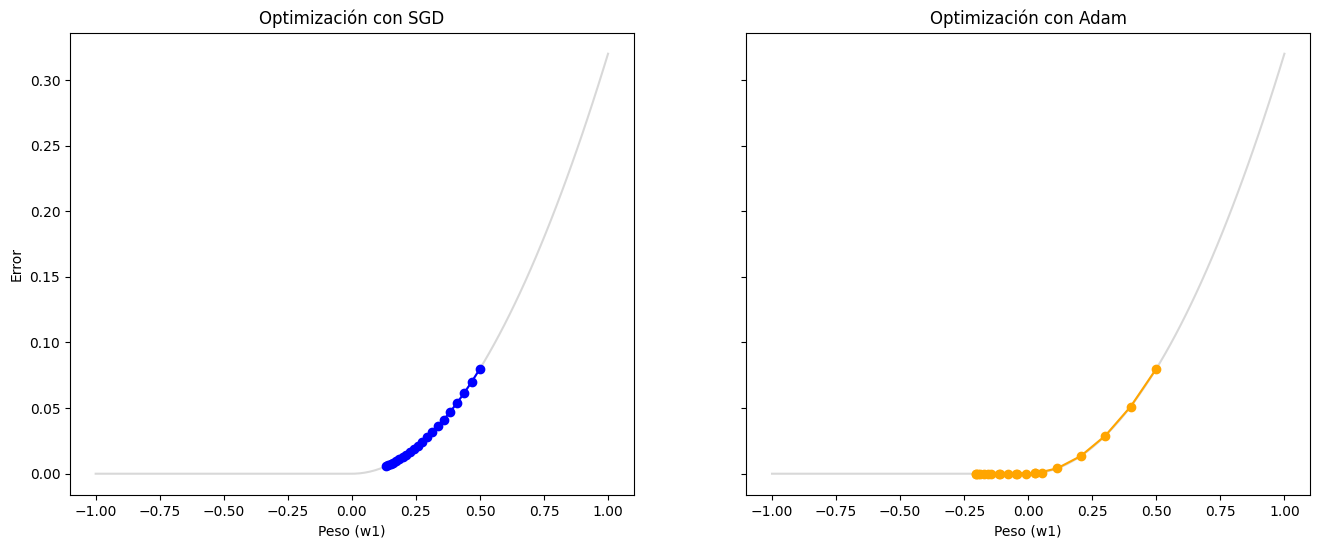

In [107]:
# Creamos una figura con 1 fila y 2 columnas
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# --- GRÁFICA 1: SGD ---
ax1.plot(pesos_posibles, errores, color='gray', alpha=0.3)
ax1.plot(historial_pesos, historial_errores, 'o-', color='blue', label='Trayectoria SGD')
ax1.set_title('Optimización con SGD')
ax1.set_xlabel('Peso (w1)')
ax1.set_ylabel('Error')

# --- GRÁFICA 2: ADAM ---
ax2.plot(pesos_posibles, errores, color='gray', alpha=0.3)
ax2.plot(historial_w_adam, historial_err_adam, 'o-', color='orange', label='Trayectoria Adam')
ax2.set_title('Optimización con Adam')
ax2.set_xlabel('Peso (w1)')

plt.show()